In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


# **Loading Datasets**

In [2]:
df = pd.read_csv('/content/drive/My Drive/Crimes_-_2001_to_Present.csv')
df.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077151 entries, 0 to 8077150
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

# **Convert Data Type**

In [4]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month
df['Hour'] = df['Date'].dt.hour
df['Updated On'].head()
df['Updated On'] = pd.to_datetime(df['Updated On'], errors='coerce')
df['Updated On Year'] = df['Updated On'].dt.year
df['Updated On Month'] = df['Updated On'].dt.month
df['Updated On Hour'] = df['Updated On'].dt.hour

df.info()

<ipython-input-4-eb4fa1d513c8>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Updated On'] = pd.to_datetime(df['Updated On'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077151 entries, 0 to 8077150
Data columns (total 27 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            datetime64[ns]
 19  

# **Handling Null Values**

In [5]:
df.isna().sum()

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,13087
Arrest,0
Domestic,0


In [6]:
df = df.dropna(subset=['Location Description', 'Ward', 'Community Area','X Coordinate','Y Coordinate','Latitude','Longitude','Location','District'])
df.isna().sum()

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,0
Arrest,0
Domestic,0


In [7]:
df.shape

(7373082, 27)

# **Temporal Analysis**

**Crime Trends Over Time**

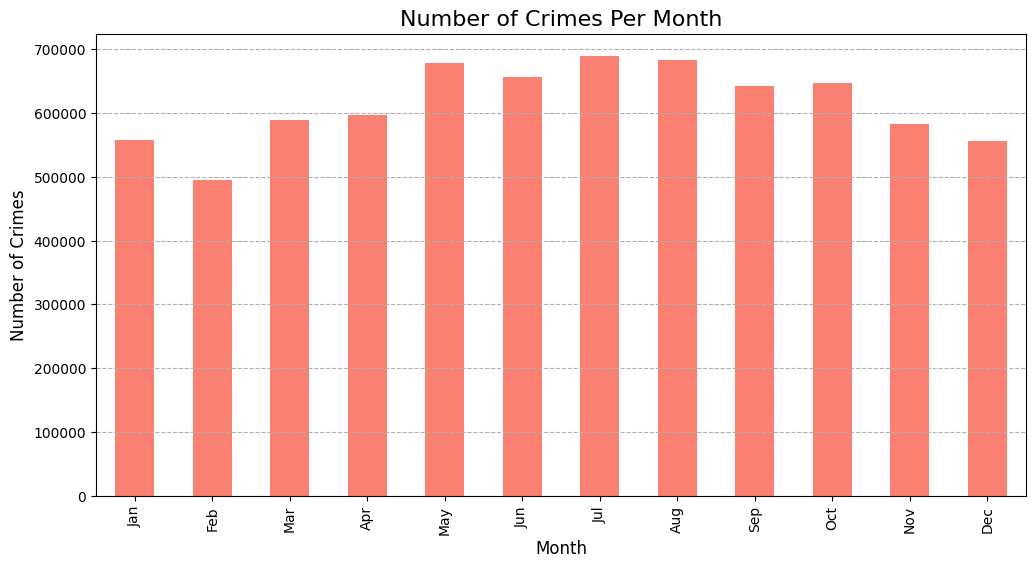

<ipython-input-23-96357356c68e>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




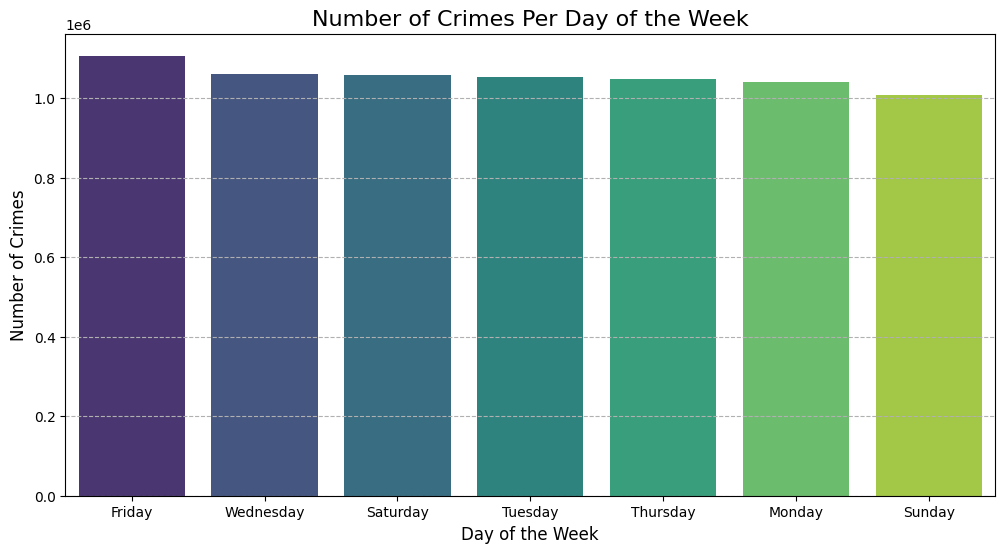

In [23]:
# Number of Crimes per Year
crime_by_year = df.groupby('Year').size().reset_index(name='Count')
fig_1 = px.bar(crime_by_year,x='Year',y='Count',title=f'Number of Crimes Per Year',color_discrete_sequence=px.colors.sequential.Viridis,height=500, width=1000)
fig_1.show()

# Number of Crimes per Month
crime_by_month = df.groupby('Month').size()
plt.figure(figsize=(12, 6))
crime_by_month.plot(kind='bar', color='salmon')
plt.title('Number of Crimes Per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(range(12),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--')
plt.show()

# Number of Crimes per Day
df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.day_name()
crime_by_day = df['DayOfWeek'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_by_day.index, y=crime_by_day.values, palette='viridis')
plt.title('Number of Crimes Per Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

**Peak Crime Hours**

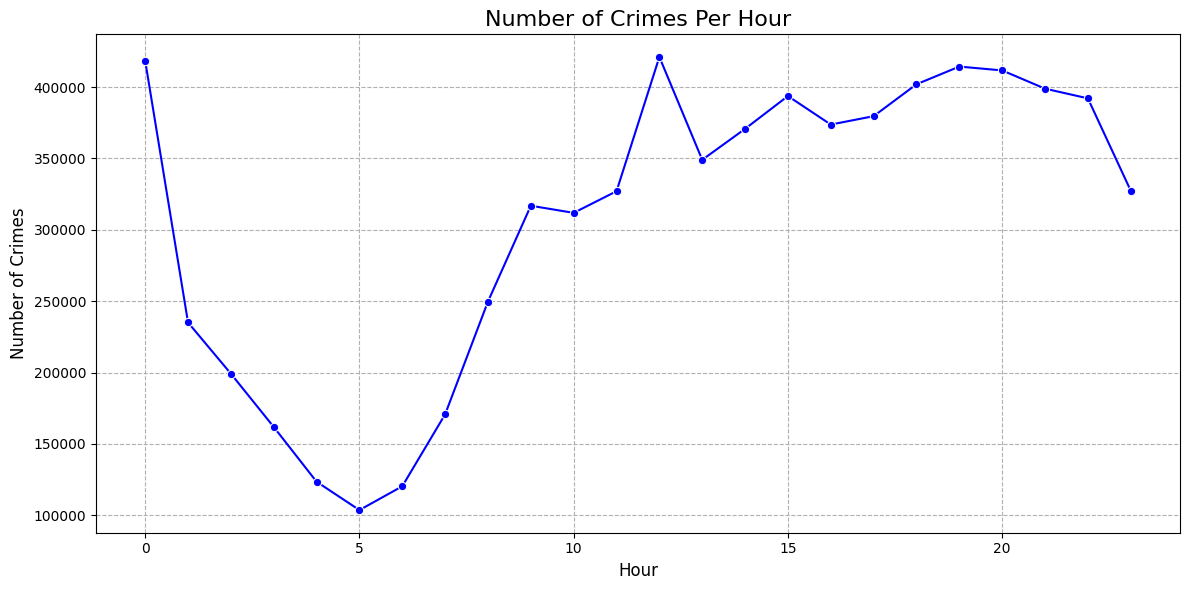

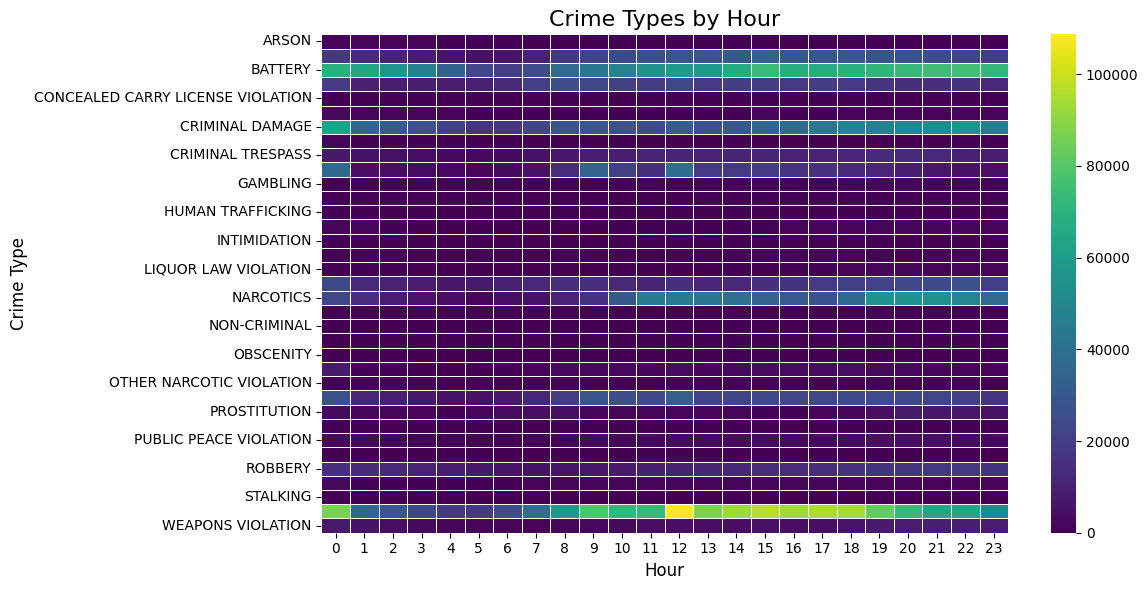

In [24]:
# Number of Crimes by Hour
crime_by_hour = df.groupby('Hour').size()
plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_by_hour.reset_index(name='Count'), x='Hour', y='Count', marker='o', color='blue')
plt.title("Number of Crimes Per Hour", fontsize=16)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

# Crimes Types by Hour
hourly_crime_type = df.groupby(['Hour', 'Primary Type']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_crime_type.T,cmap="viridis",linewidths=0.5,linecolor='white')
plt.title("Crime Types by Hour", fontsize=16)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Crime Type", fontsize=12)
plt.tight_layout()
plt.show()

# **Geospatial Analysis**

**District Analysis**

<ipython-input-39-4cc5ce8cee65>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




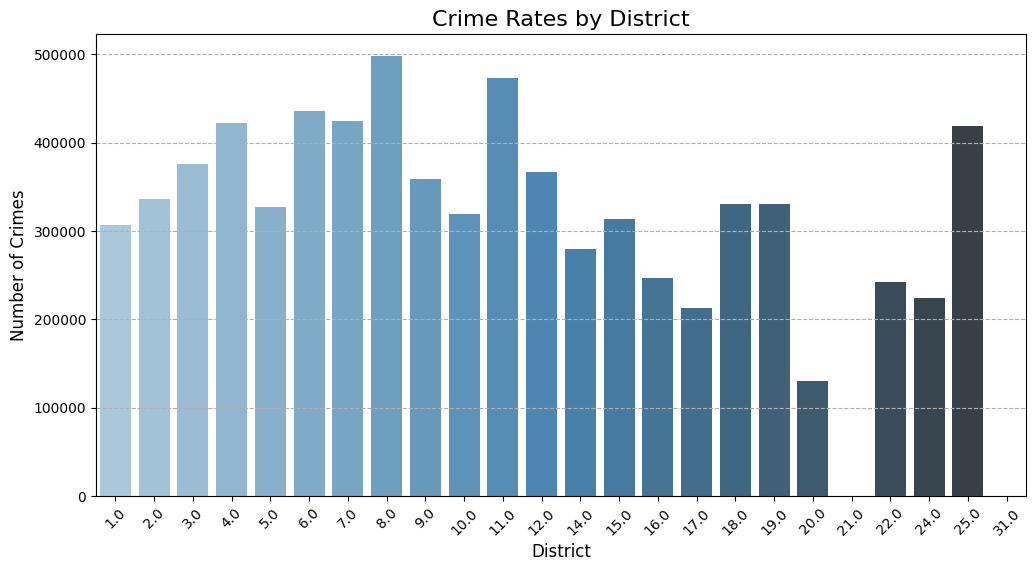

In [39]:
# Crime Rates by District
crime_by_district = df.groupby('District').size().reset_index(name='Crime Count')
crime_by_district = crime_by_district.sort_values(by='Crime Count', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='District', y='Crime Count', data=crime_by_district, palette='Blues_d')
plt.title('Crime Rates by District', fontsize=16)
plt.xlabel('District', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

**Ward Analysis**

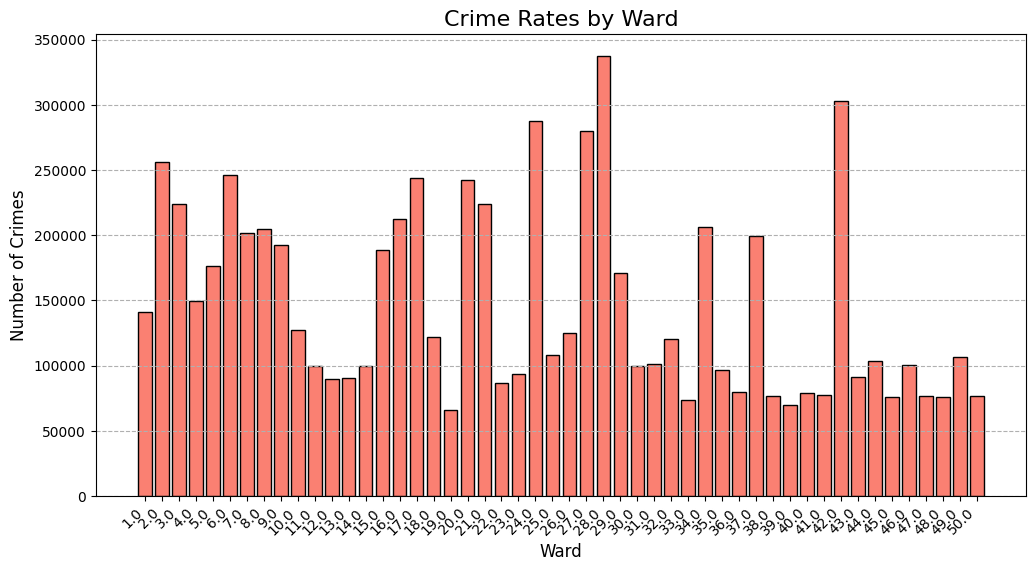

In [40]:
# Crime Rates by Ward
crime_by_ward = df.groupby('Ward').size().reset_index(name='Crime Count')
crime_by_ward = crime_by_ward.sort_values(by='Crime Count', ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(crime_by_ward['Ward'], crime_by_ward['Crime Count'], color='salmon', edgecolor='black')
ax.set_title('Crime Rates by Ward', fontsize=16)
ax.set_xlabel('Ward', fontsize=12)
ax.set_ylabel('Number of Crimes', fontsize=12)
ax.set_xticks(crime_by_ward['Ward'])
ax.set_xticklabels(crime_by_ward['Ward'], rotation=45, ha='right')
ax.grid(axis='y', linestyle='--')
plt.show()

# **Crime Type Analysis**

**Distribution of Crime Types**

<ipython-input-28-b4707f8ea912>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




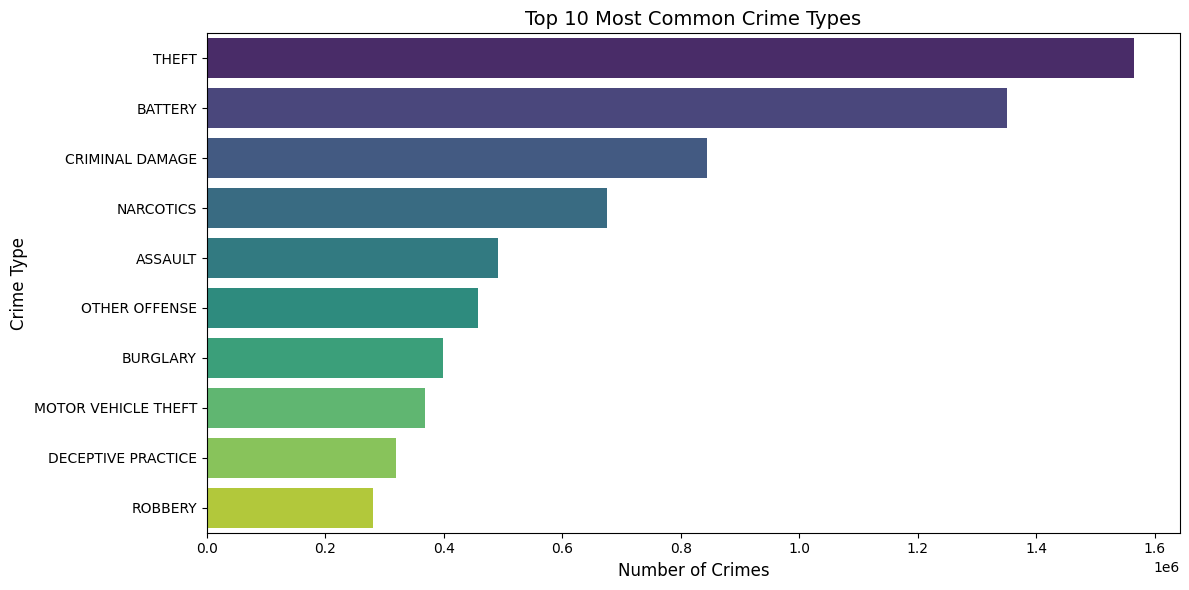

<ipython-input-28-b4707f8ea912>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




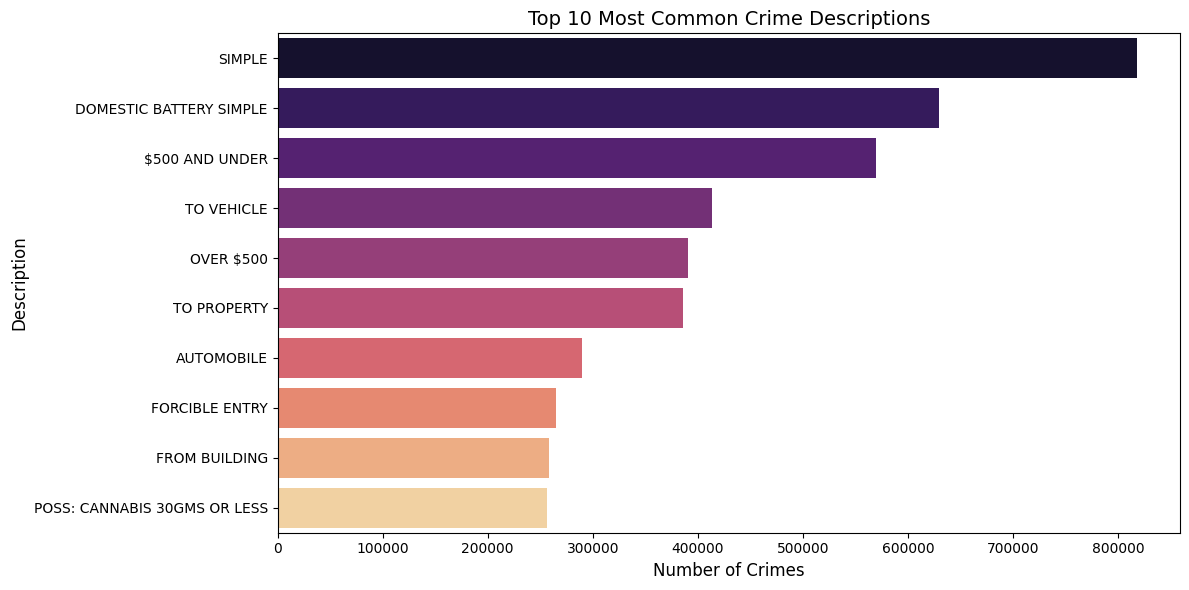

In [28]:
# Most Common Crime Types
top_crime_types = df['Primary Type'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_crime_types.values,y=top_crime_types.index,palette="viridis")
plt.title("Top 10 Most Common Crime Types", fontsize=14)
plt.xlabel("Number of Crimes", fontsize=12)
plt.ylabel("Crime Type", fontsize=12)
plt.tight_layout()
plt.show()

# Most Common Crime Descriptions
top_descriptions = df['Description'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_descriptions.values,y=top_descriptions.index,palette="magma")
plt.title("Top 10 Most Common Crime Descriptions", fontsize=14)
plt.xlabel("Number of Crimes", fontsize=12)
plt.ylabel("Description", fontsize=12)
plt.tight_layout()
plt.show()

# **Severity Analysis**

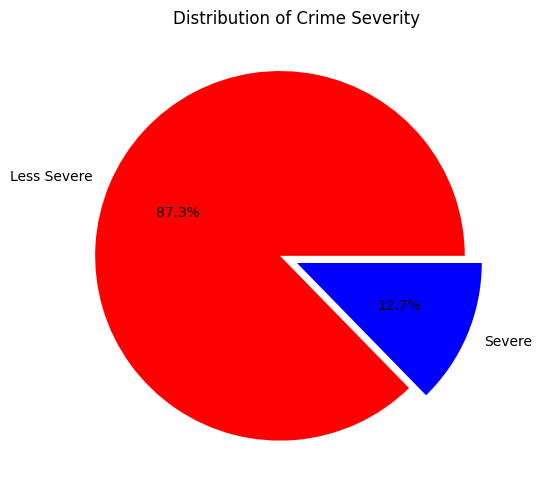

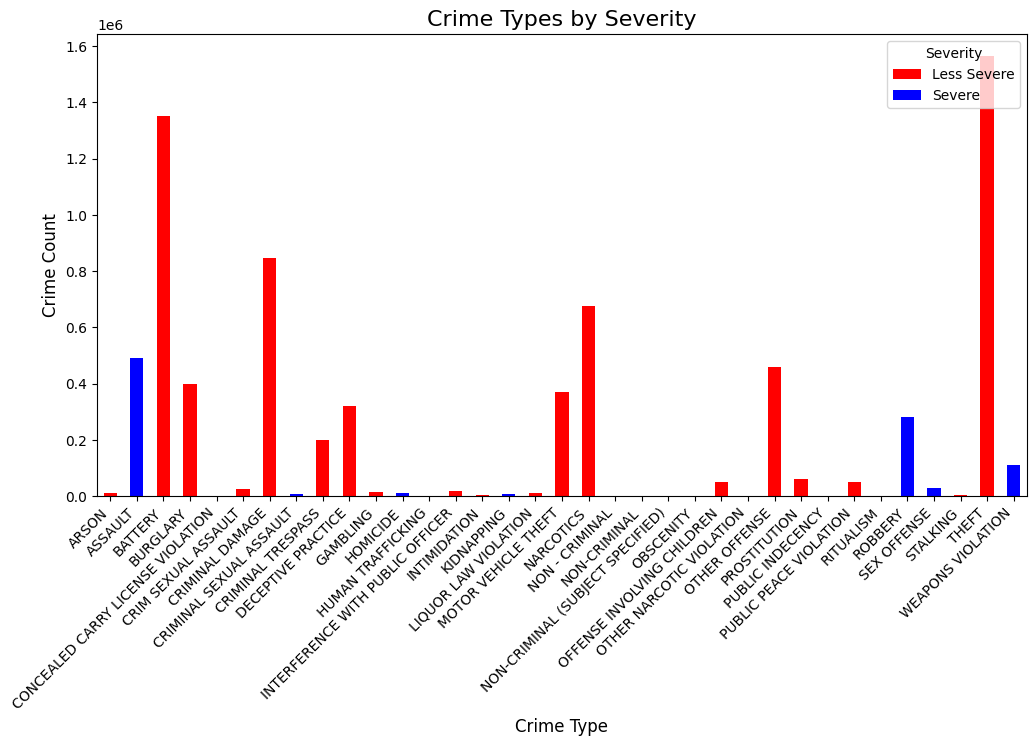

In [31]:
# Categorizing Severe and Less Severe Crimes
severe_crimes = ['HOMICIDE', 'CRIMINAL SEXUAL ASSAULT', 'ROBBERY', 'ASSAULT', 'SEX OFFENSE', 'WEAPONS VIOLATION', 'KIDNAPPING','HUMAN TRAFFICKING']
df['Severity'] = df['Primary Type'].apply(lambda x: 'Severe' if x in severe_crimes else 'Less Severe')

# Crime Severity Distribtion
severity_counts = df['Severity'].value_counts()
plt.figure(figsize=(12,6))
severity_counts.plot.pie(autopct='%1.1f%%', colors=['red', 'blue'], labels=severity_counts.index, explode=(0.1, 0))
plt.title("Distribution of Crime Severity")
plt.ylabel('')
plt.show()

# Crime Counts with Crime Type by Severity
severity_type_counts = df.groupby(['Severity', 'Primary Type']).size().unstack(fill_value=0)
severity_type_counts.T.plot(kind='bar', figsize=(12, 6), stacked=True, color=['red', 'blue'])
plt.title("Crime Types by Severity", fontsize=16)
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Crime Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Severity", loc='upper right')
plt.show()

# **Arrest Analysis**

**Arrest Rates**

Overall Arrest Rate: 25.37%



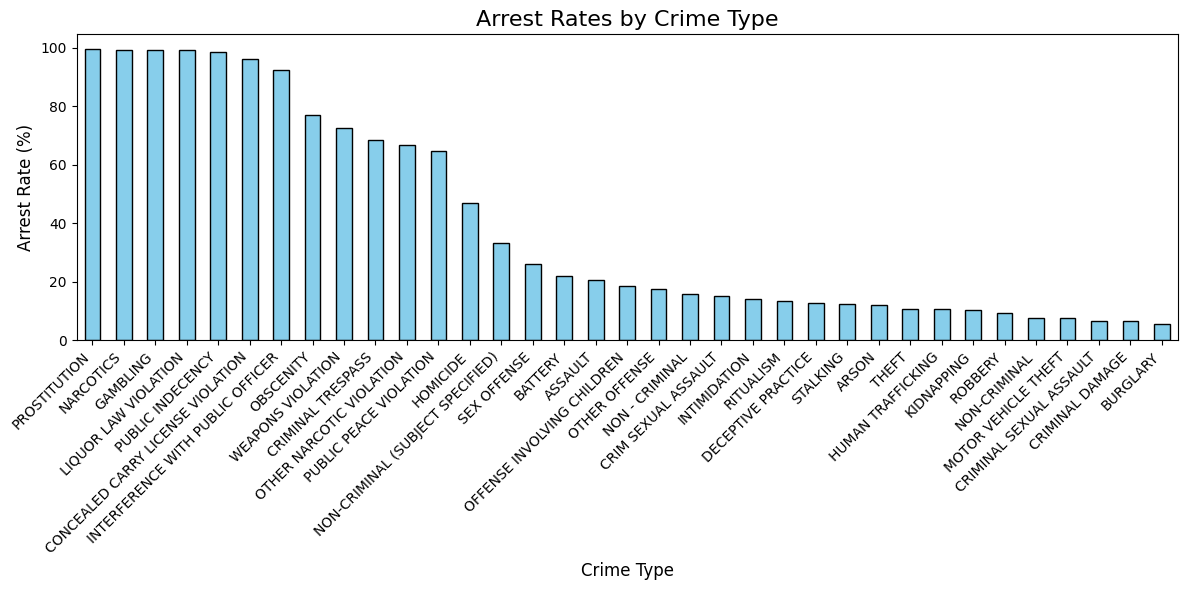

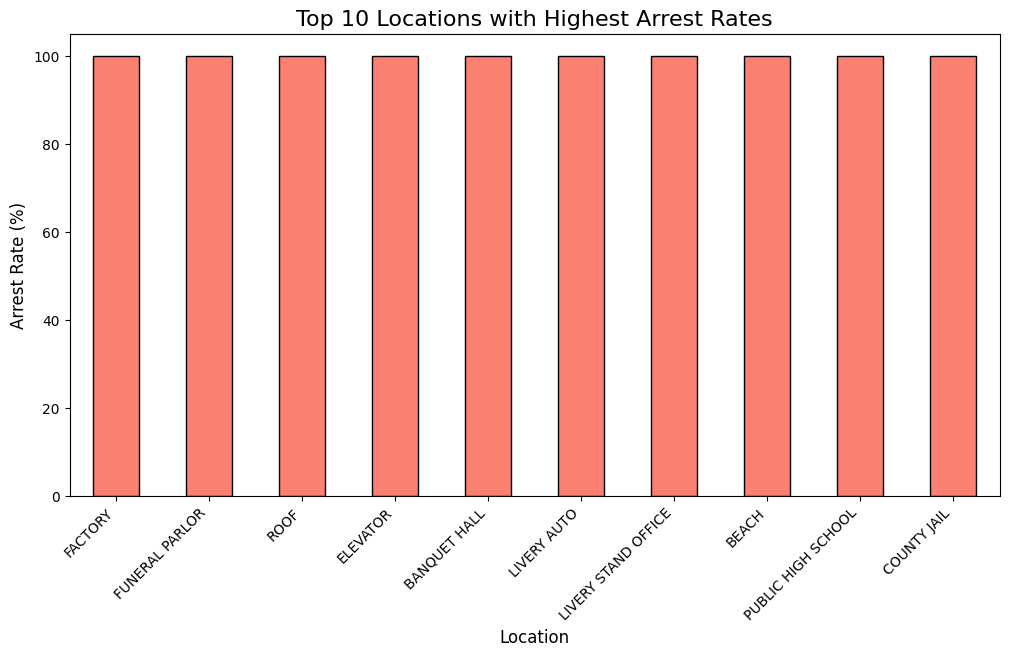

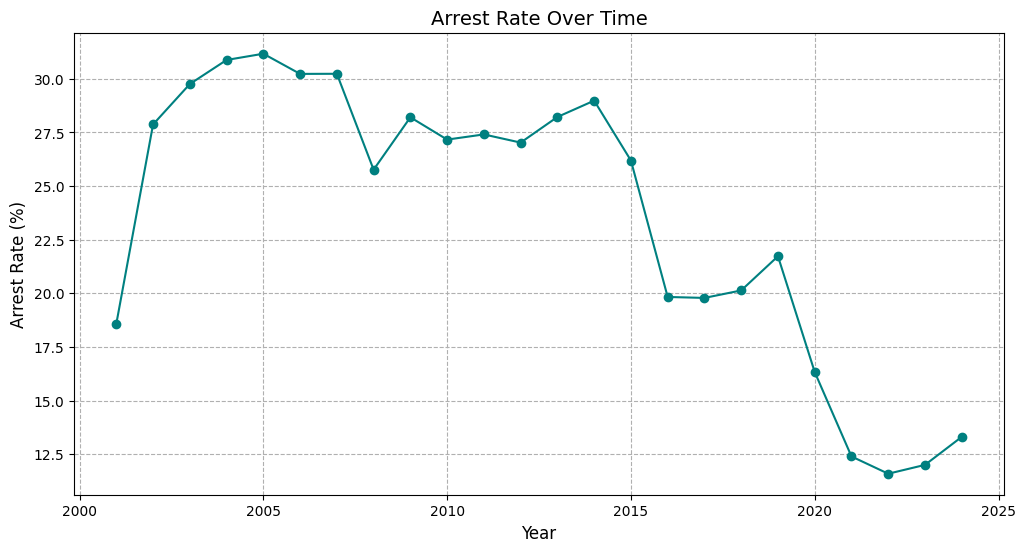

In [33]:
# Overall Arrest Rate
overall_arrest_rate = (df['Arrest'].mean()) * 100
print(f"Overall Arrest Rate: {overall_arrest_rate:.2f}%")
print("")

# Arrest Rates by Crime Type
arrest_rate_by_type = df.groupby('Primary Type')['Arrest'].mean() * 100
arrest_rate_by_type = arrest_rate_by_type.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
arrest_rate_by_type.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Arrest Rates by Crime Type", fontsize=16)
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Arrest Rate (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Arrest Rates by Location
arrest_rate_by_location = df.groupby('Location Description')['Arrest'].mean()* 100
top_locations = arrest_rate_by_location.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Top 10 Locations with Highest Arrest Rates", fontsize=16)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Arrest Rate (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

# Arrest Rate by Year
arrest_by_year = df.groupby('Year')['Arrest'].mean() * 100
plt.figure(figsize=(12, 6))
arrest_by_year.plot(kind='line', marker='o', color='teal')
plt.title("Arrest Rate Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Arrest Rate (%)", fontsize=12)
plt.grid(True, linestyle='--')
plt.show()

# **Domestic Incident Analysis**

**Domestic vs Non-Domestic Crimes**

<ipython-input-37-7494743ecb5f>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




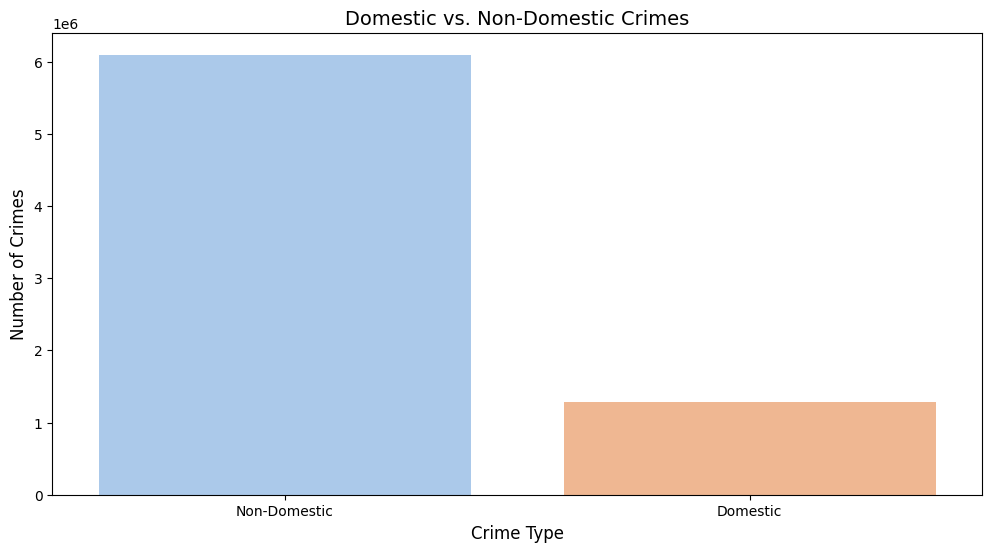

Arrest Rate for Domestic Crimes: 19.32%
Arrest Rate for Non-Domestic Crimes: 26.64%



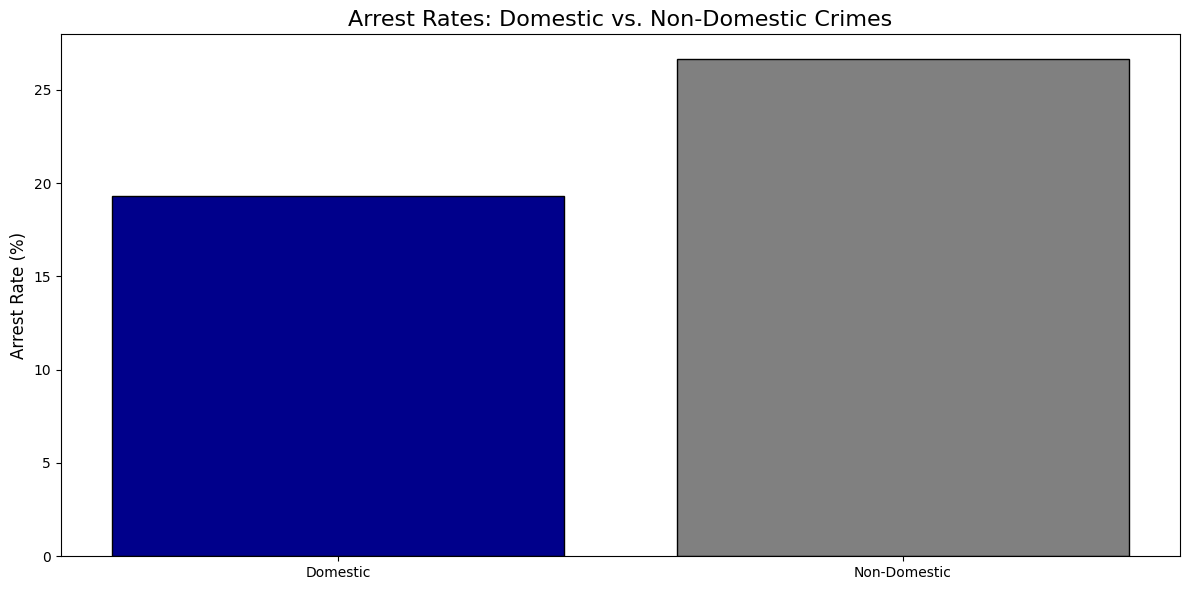

<Figure size 1200x600 with 0 Axes>

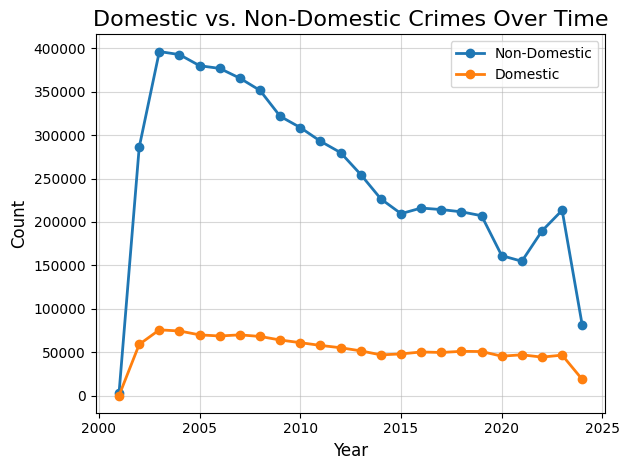

In [37]:
# Crime Count of Domestic and Non-Domestic
domestic_counts = df['Domestic'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=domestic_counts.index,y=domestic_counts.values,palette="pastel")
plt.xticks([0, 1], ['Non-Domestic', 'Domestic'])
plt.title("Domestic vs. Non-Domestic Crimes", fontsize=14)
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.show()

# Arrest Rates for Domestic and Non-Domestic Crimes
arrest_rate_domestic = df[df['Domestic'] == True]['Arrest'].mean() * 100
arrest_rate_non_domestic = df[df['Domestic'] == False]['Arrest'].mean() * 100
print(f"Arrest Rate for Domestic Crimes: {arrest_rate_domestic:.2f}%")
print(f"Arrest Rate for Non-Domestic Crimes: {arrest_rate_non_domestic:.2f}%")
print("")

plt.figure(figsize=(12, 6))
plt.bar(['Domestic', 'Non-Domestic'], [arrest_rate_domestic, arrest_rate_non_domestic],color=['darkblue', 'gray'], edgecolor='black')
plt.title("Arrest Rates: Domestic vs. Non-Domestic Crimes", fontsize=16)
plt.ylabel("Arrest Rate (%)", fontsize=12)
plt.tight_layout()
plt.show()

# Domestic vs. Non-Domestic Crimes over Time
domestic_trends = df.groupby(['Year', 'Domestic']).size().unstack()
plt.figure(figsize=(12, 6))
domestic_trends.plot(marker='o', linewidth=2)
plt.title("Domestic vs. Non-Domestic Crimes Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(["Non-Domestic", "Domestic"])
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# **Location-Specific Analysis**

**Location Description Analysis**

<ipython-input-38-dc40ea57c17c>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




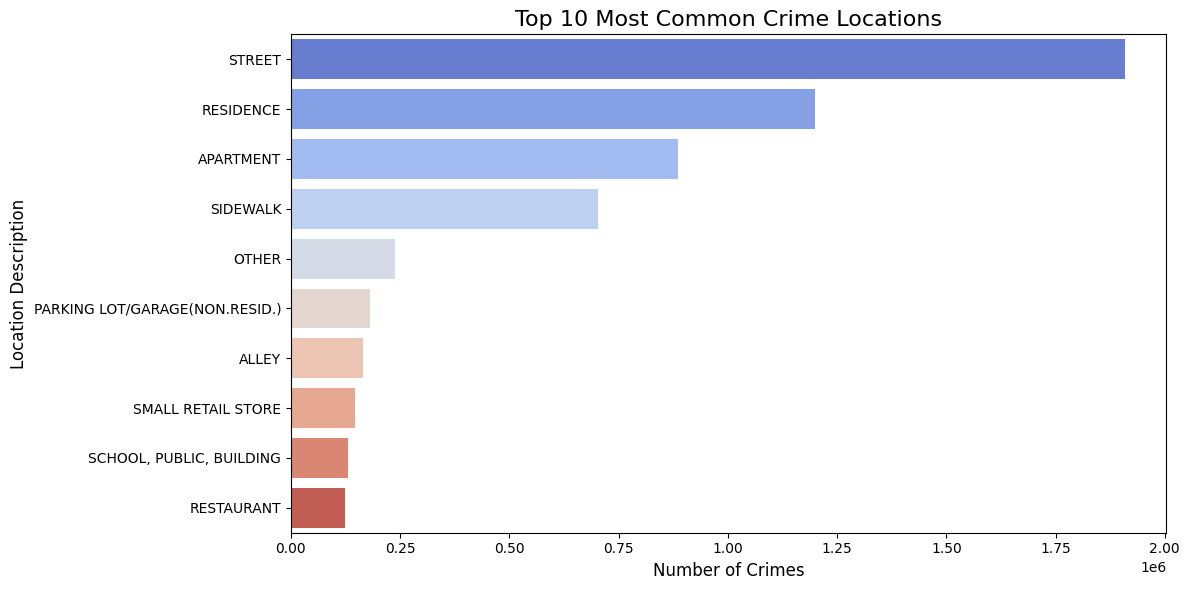

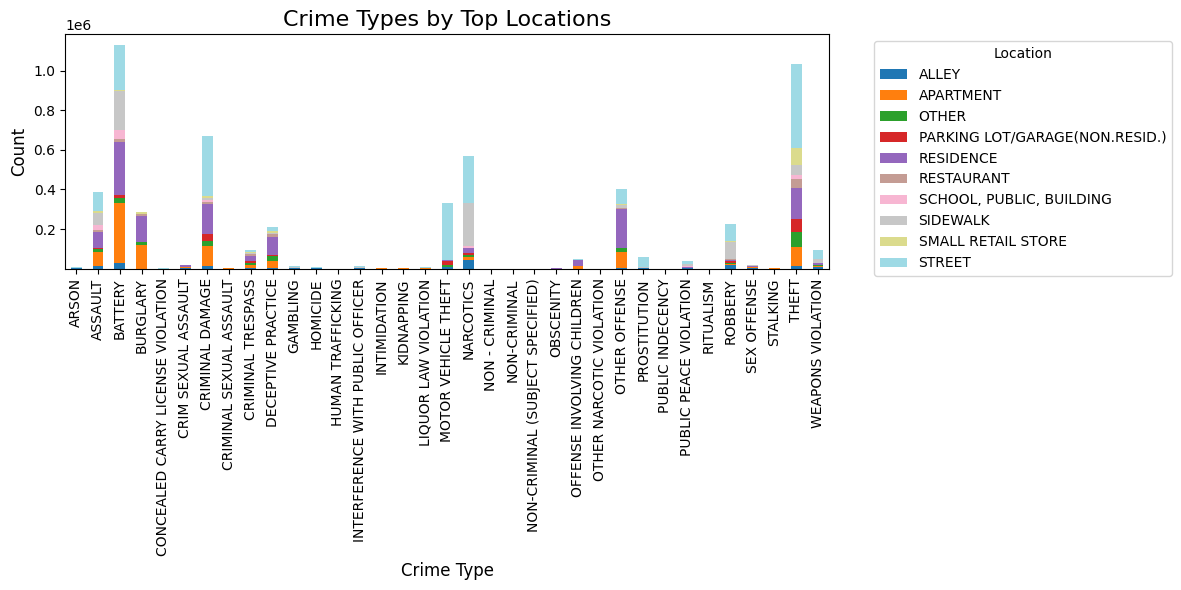

In [38]:
# Most Common Crime locations
common_locations = df['Location Description'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=common_locations.values,y=common_locations.index,palette="coolwarm")
plt.title("Top 10 Most Common Crime Locations", fontsize=16)
plt.xlabel("Number of Crimes", fontsize=12)
plt.ylabel("Location Description", fontsize=12)
plt.tight_layout()
plt.show()

# Crime Type Distribution for the Top Locations
top_locations = df['Location Description'].value_counts().head(10)
top_location_data = df[df['Location Description'].isin(top_locations.index)]

crime_by_location = top_location_data.groupby(['Location Description', 'Primary Type']).size().unstack(fill_value=0)
crime_by_location.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Crime Types by Top Locations", fontsize=16)
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Comparison by Beat**

<ipython-input-41-64d35936f60c>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




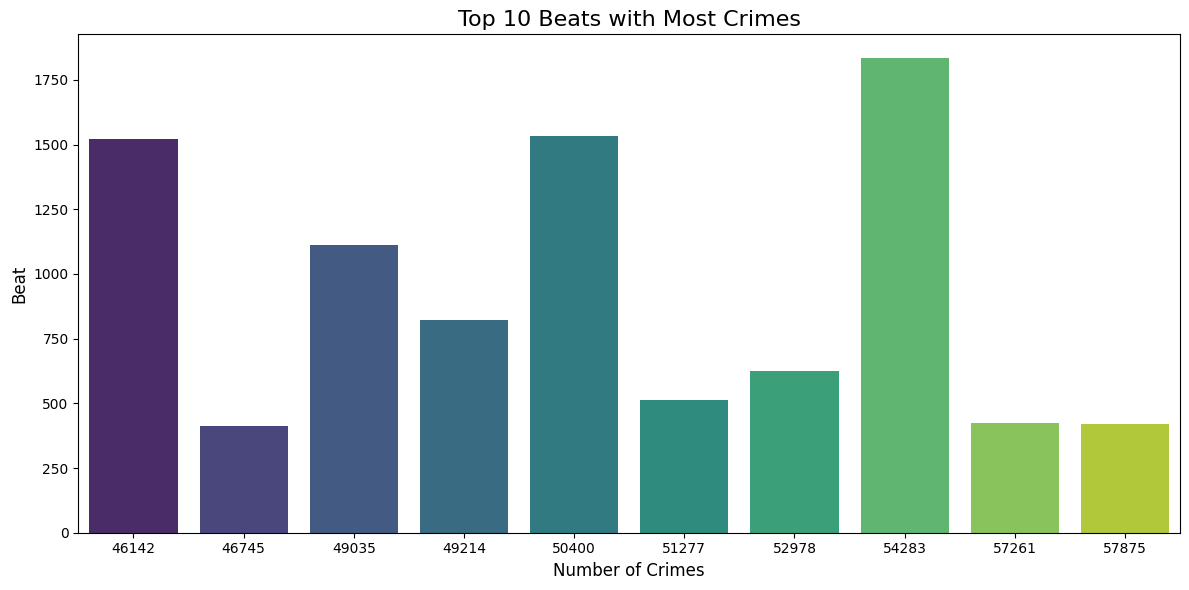

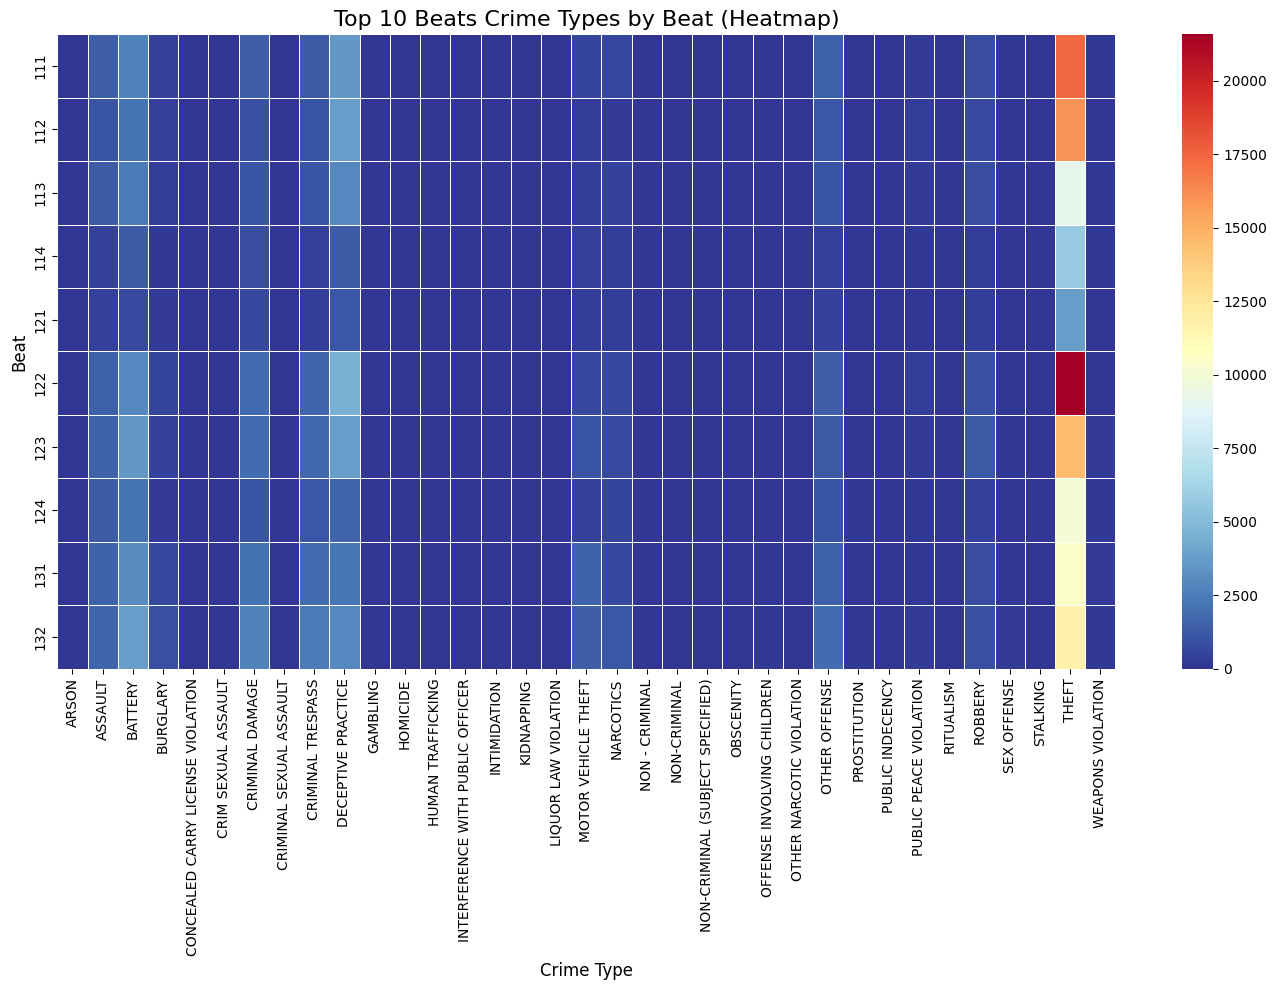

In [41]:
# Top 10 Beats with Most Crimes
beat_crime_counts = df['Beat'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=beat_crime_counts.values,y=beat_crime_counts.index,palette="viridis")
plt.title("Top 10 Beats with Most Crimes", fontsize=16)
plt.xlabel("Number of Crimes", fontsize=12)
plt.ylabel("Beat", fontsize=12)
plt.tight_layout()
plt.show()

# Top 10 Beats Crime Types with Crime Count by Beat
beat_crime_types = df.groupby(['Beat', 'Primary Type']).size().unstack(fill_value=0).head(10)
plt.figure(figsize=(14, 10))
sns.heatmap(beat_crime_types,cmap="RdYlBu_r",linewidths=0.5,linecolor='white')
plt.title("Top 10 Beats Crime Types by Beat (Heatmap)", fontsize=16)
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Beat", fontsize=12)
plt.tight_layout()
plt.show()

**Comparison by Community Area**

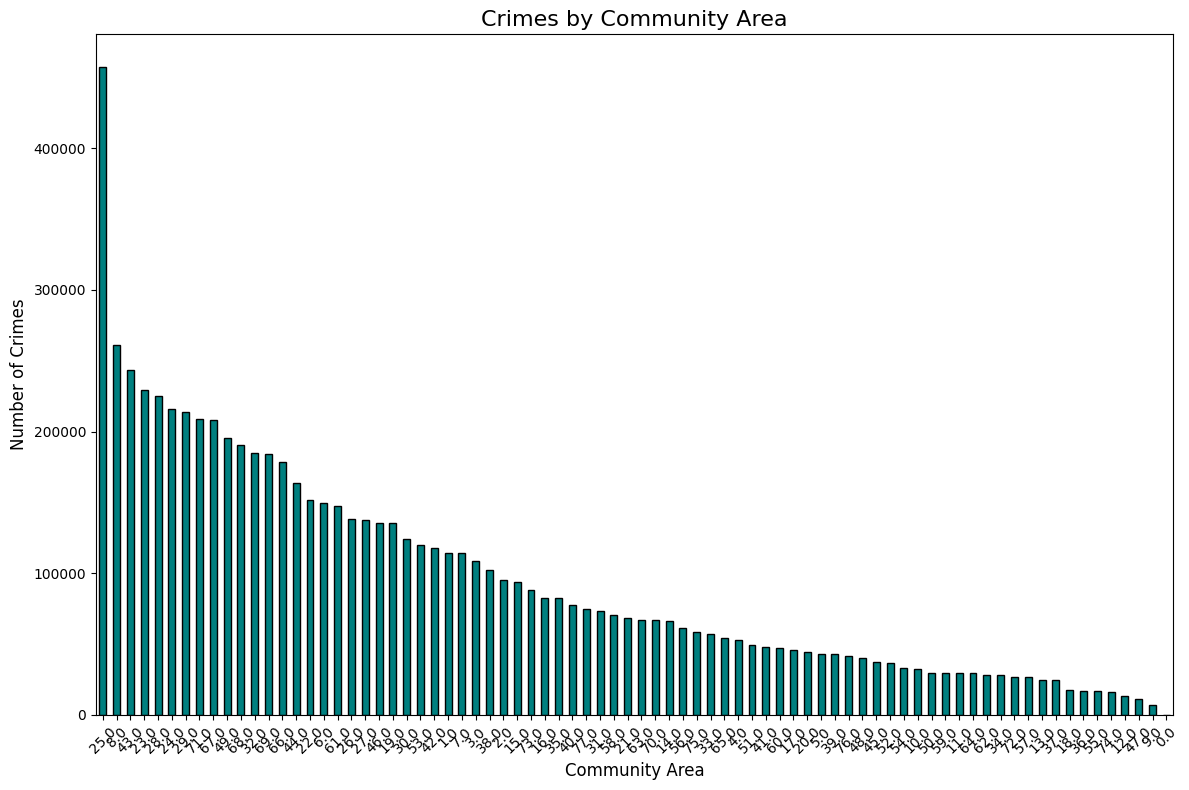

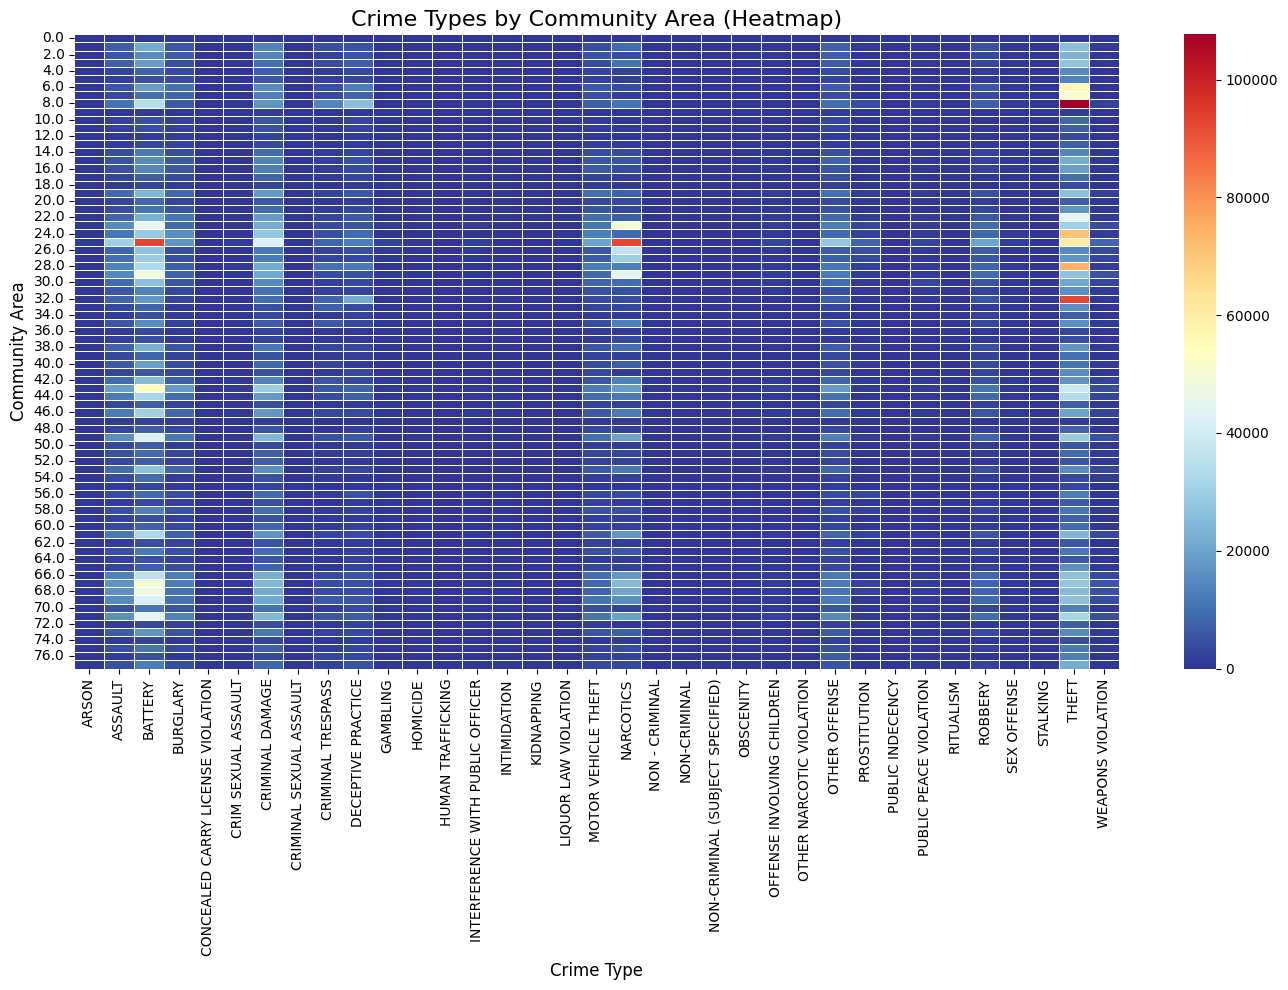

In [42]:
# Crime Counts by Community Area
community_crime_counts = df['Community Area'].value_counts()
plt.figure(figsize=(12, 8))
community_crime_counts.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Crimes by Community Area", fontsize=16)
plt.xlabel("Community Area", fontsize=12)
plt.ylabel("Number of Crimes", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Crime Types with Crime Count by Community Area
community_crime_types = df.groupby(['Community Area', 'Primary Type']).size().unstack(fill_value=0)
plt.figure(figsize=(14, 10))
sns.heatmap(community_crime_types,cmap="RdYlBu_r",linewidths=0.5,linecolor='white')
plt.title("Crime Types by Community Area (Heatmap)", fontsize=16)
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Community Area", fontsize=12)
plt.tight_layout()
plt.show()

# **Seasonal and Weather Impact**

**Seasonal Trends**

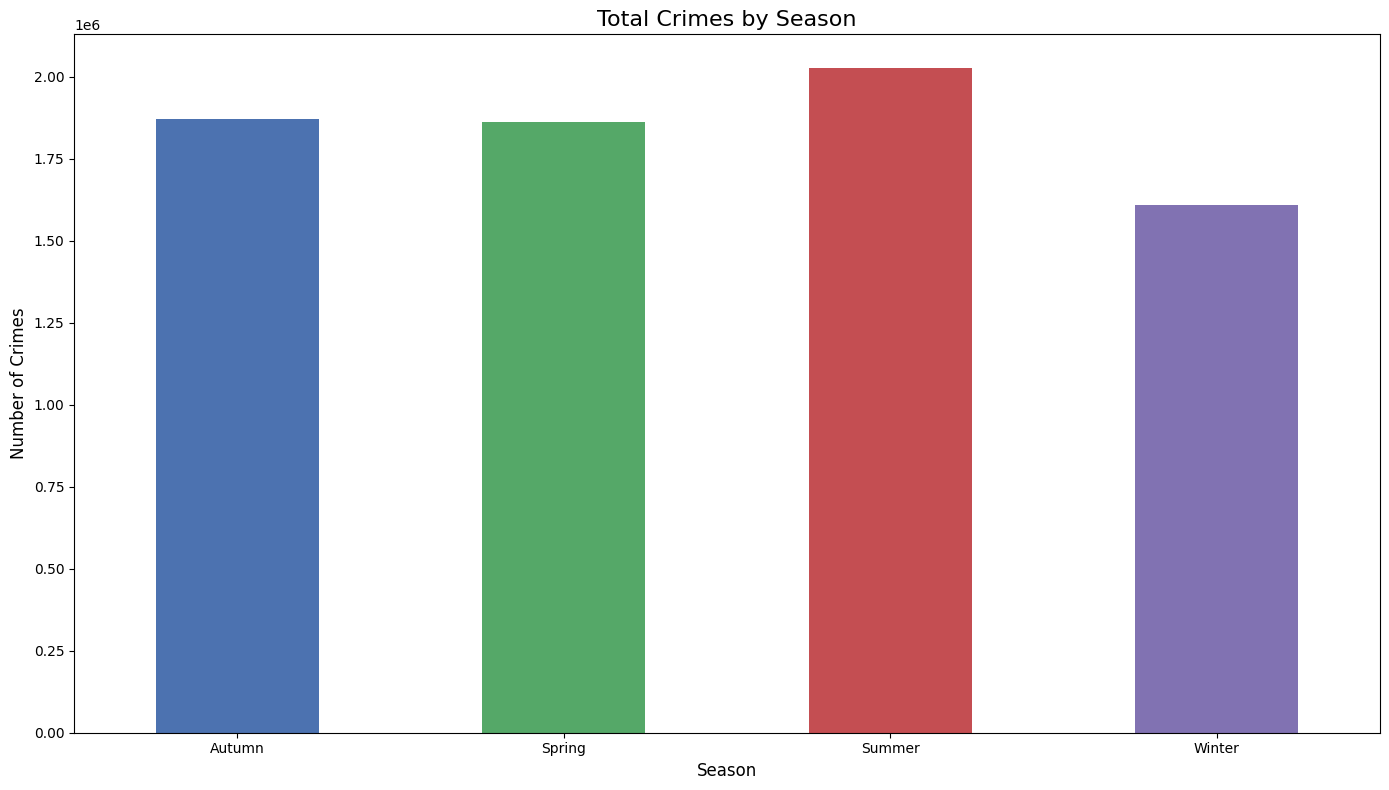

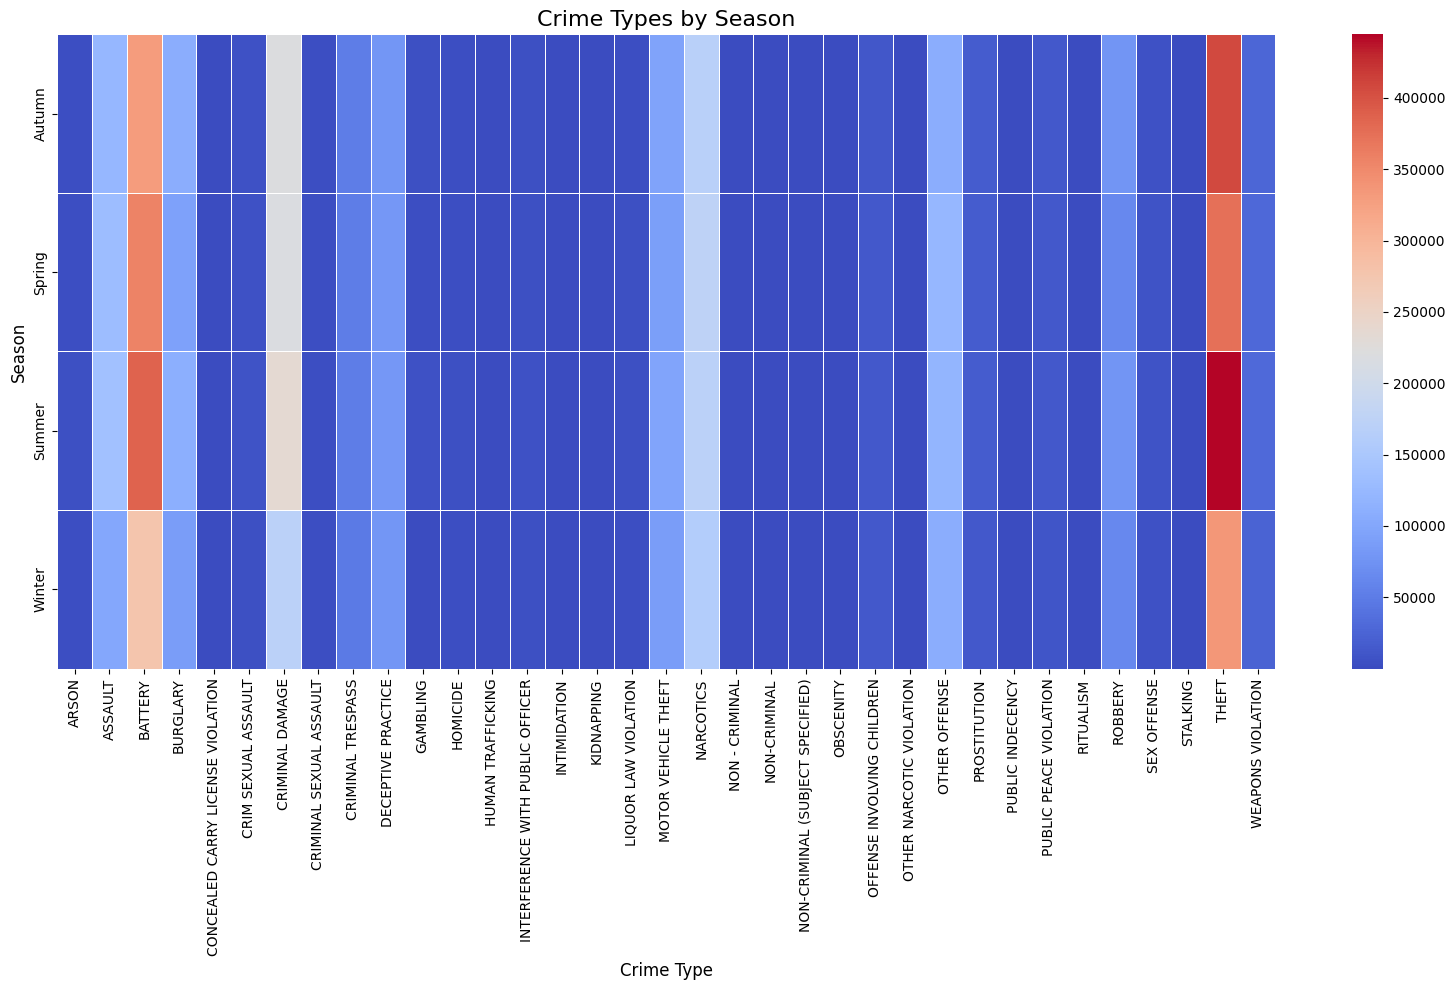

In [43]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
df['Season'] = df['Month'].apply(get_season)

# Crime Count by Season
seasonal_crime_data = df.groupby(['Season', 'Primary Type']).size().unstack(fill_value=0)
plt.figure(figsize=(14, 8))
seasonal_crime_data.sum(axis=1).plot(kind='bar', color=['#4c72b0', '#55a868', '#c44e52', '#8172b2'])
plt.title('Total Crimes by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Crime Type by Season
plt.figure(figsize=(16, 10))
sns.heatmap(seasonal_crime_data, cmap="coolwarm", annot=False, fmt='d', linewidths=0.5)
plt.title('Crime Types by Season', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Season', fontsize=12)
plt.tight_layout()
plt.show()

# **Repeat Offenders**

**Repeat Crime Locations**

<ipython-input-46-ec0388866639>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




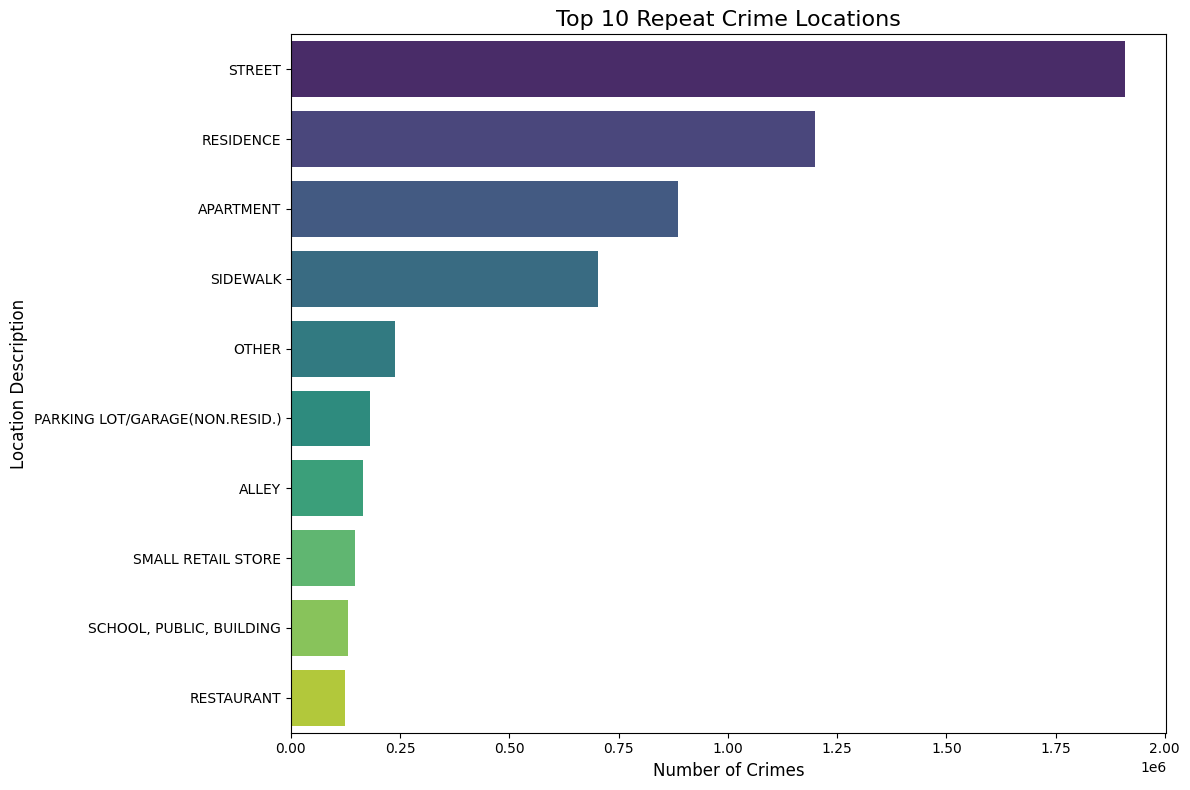

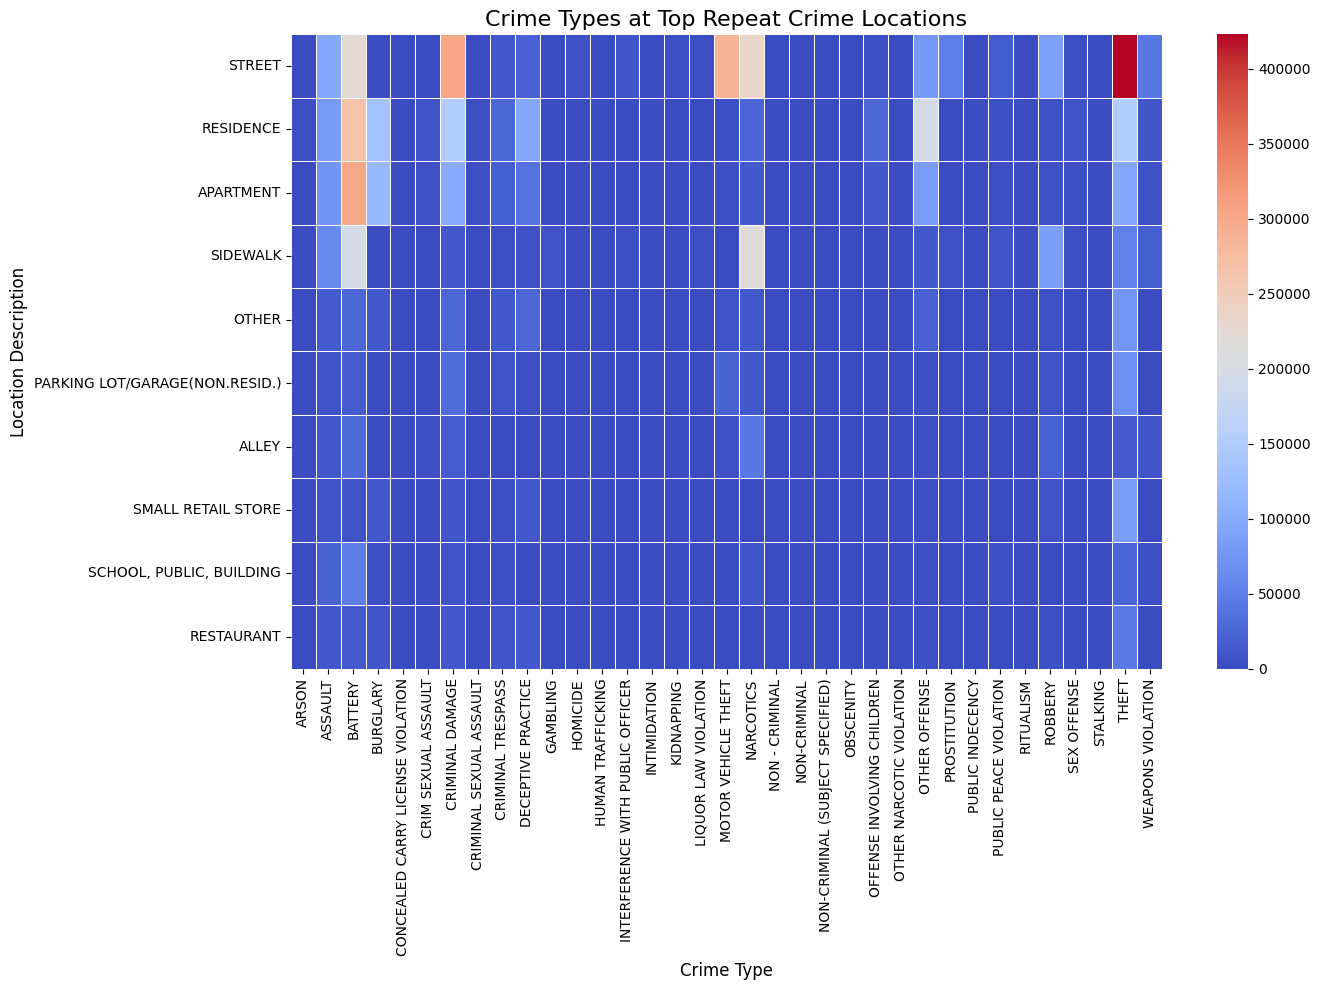

In [46]:
# Repeat Crime Locations
location_counts = df.groupby('Location Description')['ID'].count().sort_values(ascending=False)
top_locations = location_counts.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")
plt.title("Top 10 Repeat Crime Locations", fontsize=16)
plt.xlabel("Number of Crimes", fontsize=12)
plt.ylabel("Location Description", fontsize=12)
plt.tight_layout()
plt.show()

# Crime Types at Top Locations
repeat_locations_crime_type = df.groupby(['Location Description', 'Primary Type']).size().unstack(fill_value=0)
top_repeat_locations = repeat_locations_crime_type.loc[top_locations.index]
plt.figure(figsize=(14, 10))
sns.heatmap(top_repeat_locations, cmap="coolwarm", linewidths=0.5, annot=False, fmt='d')
plt.title("Crime Types at Top Repeat Crime Locations", fontsize=16)
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Location Description", fontsize=12)
plt.tight_layout()
plt.show()

# **Recidivism**

**Recidivism Rates**

<ipython-input-48-508f86a84799>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




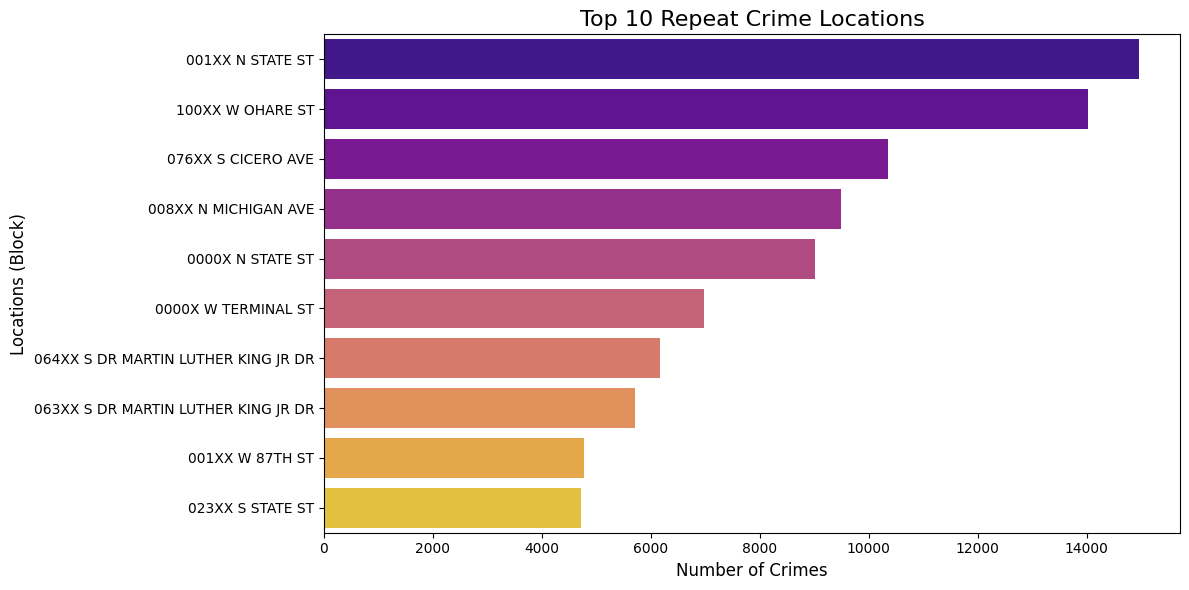

Recidivism Rate: 0.01%
Recidivism Rate: 0.01%



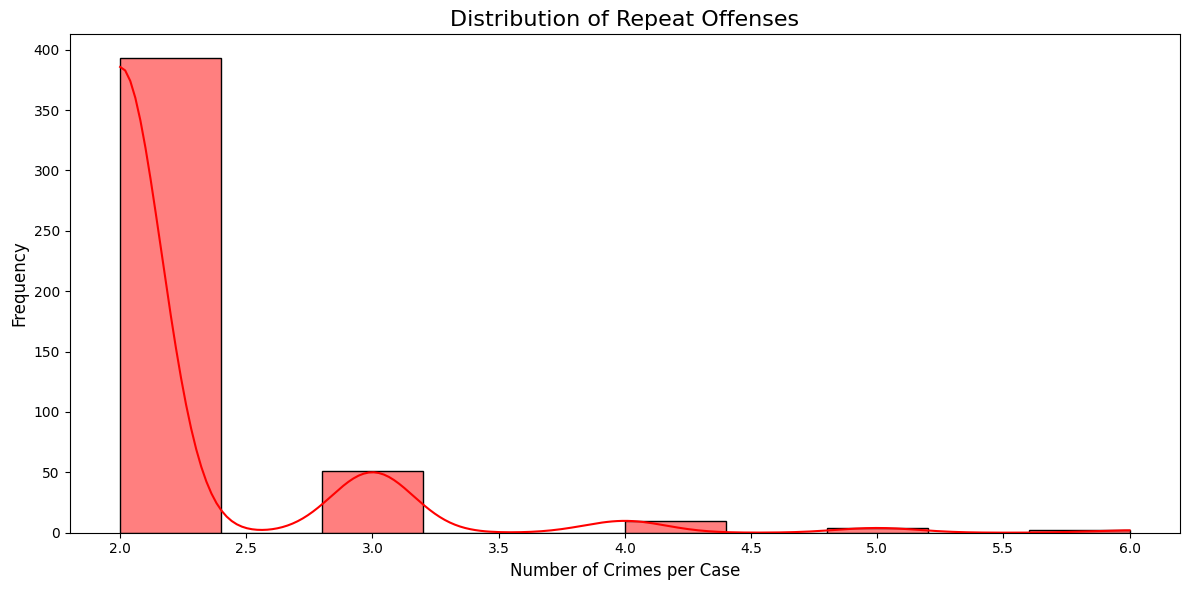

In [48]:
# Top 10 Repeat Crime Locations (Block)
repeat_locations = df.groupby('Block').size().reset_index(name='Crime Count')
# Locations with more than one crime
repeat_locations = repeat_locations[repeat_locations['Crime Count'] > 1].sort_values(by='Crime Count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Crime Count', y='Block', data=repeat_locations.head(10), palette="plasma")
plt.title("Top 10 Repeat Crime Locations", fontsize=16)
plt.xlabel("Number of Crimes", fontsize=12)
plt.ylabel("Locations (Block)", fontsize=12)
plt.tight_layout()
plt.show()

crime_cases = df.groupby('Case Number').size().reset_index(name='Occurrences')
repeat_cases = crime_cases[crime_cases['Occurrences'] > 1]
recidivism_rate = (len(repeat_cases) / len(crime_cases)) * 100
print(f"Recidivism Rate: {recidivism_rate:.2f}%")

# Recidivism Analysis
crime_cases = df.groupby('Case Number').size().reset_index(name='Occurrences')
repeat_cases = crime_cases[crime_cases['Occurrences'] > 1]
# Calculate Recidivism Rate
recidivism_rate = (len(repeat_cases) / len(crime_cases)) * 100
print(f"Recidivism Rate: {recidivism_rate:.2f}%")
print("")

# Distribution of Repeat Cases
plt.figure(figsize=(12, 6))
sns.histplot(repeat_cases['Occurrences'], bins=10, kde=True, color='red')
plt.title("Distribution of Repeat Offenses", fontsize=16)
plt.xlabel("Number of Crimes per Case", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

# **Predictive Modeling**

**Predictive Analysis**

In [50]:
# Classification: Predicting Crime Type (Multi-class classification)
# Based on Location, Time, Severity and Season data, predict the crime type

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Encoding Categorical Variables
model = LabelEncoder()
df['Primary Type Encoded'] = model.fit_transform(df['Primary Type'])
df['Season Encoded'] = model.fit_transform(df['Season'])
df['Severity Encoded'] = model.fit_transform(df['Severity'])

df_sample = df.sample(n=700000, random_state=42)
X = df_sample[['Latitude', 'Longitude', 'Hour', 'Season Encoded', 'Severity Encoded']]
y = df_sample['Primary Type Encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       252
           1       0.56      0.72      0.63      9263
           2       0.27      0.34      0.30     25549
           3       0.12      0.08      0.10      7631
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00       444
           6       0.17      0.15      0.16     16202
           7       0.07      0.01      0.02       148
           8       0.13      0.09      0.11      3837
           9       0.14      0.10      0.12      5946
          10       0.01      0.00      0.01       233
          11       0.00      0.00      0.00       251
          12       0.00      0.00      0.00         1
          13       0.01      0.00      0.00       351
          14       0.00      0.00      0.00        90
          15       0.06      0.01      0.02       104
          16       0.01      0.00      0.01       254
          17       0.08    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# **Risk Assessment**

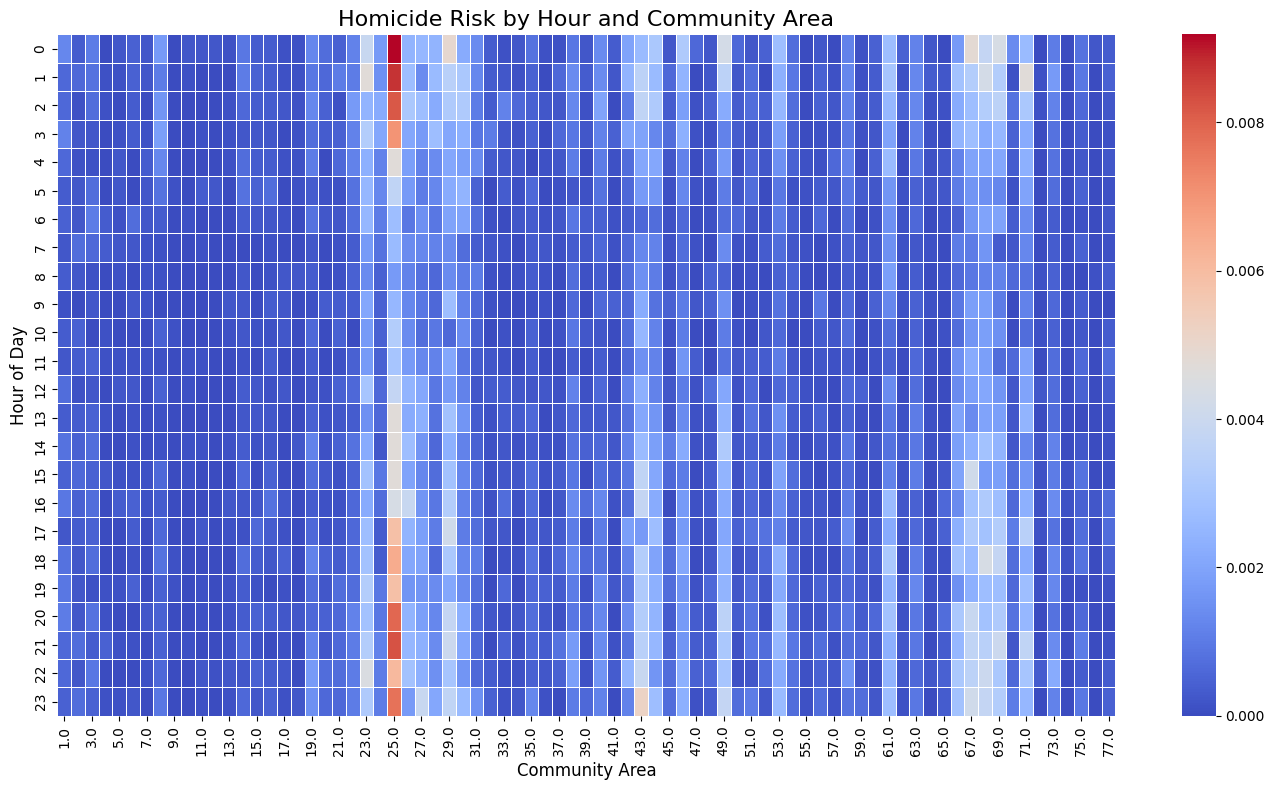

In [49]:
area_time_risk = df.groupby(['Community Area', 'Hour', 'Primary Type']).size().reset_index(name='Crime Count')

# Risk Scores
max_crime_count = area_time_risk['Crime Count'].max()
area_time_risk['Risk Score'] = area_time_risk['Crime Count'] / max_crime_count
# Example: Risk Scores for Homicides
homicide_risk = area_time_risk[area_time_risk['Primary Type'] == 'HOMICIDE']

# Time based Risk
time_risk = homicide_risk.pivot_table(index='Hour', columns='Community Area', values='Risk Score', fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(time_risk, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title("Homicide Risk by Hour and Community Area", fontsize=16)
plt.xlabel("Community Area", fontsize=12)
plt.ylabel("Hour of Day", fontsize=12)
plt.tight_layout()
plt.show()